# 1. Чисельно реалізувати моделі:

### а) модель експоненційного зростання;

In [1]:
def exponential_growth(y, k):
    return k * y

In [2]:
y = 100  
k = 0.02     
dy = exponential_growth(y, k)
print("Експоненційне зростання: dy/dt =", dy)

Експоненційне зростання: dy/dt = 2.0


### б) модель закону охолодження Ньютона;

In [3]:
def newton_cooling(T, k, T_env):
    return -k * (T - T_env)

In [4]:
T = 60       
T_env = 20   
k = 0.05      
dT = newton_cooling(T, k, T_env)
print("Закон Ньютона: dT/dt =", dT)

Закон Ньютона: dT/dt = -2.0


### в) модель аттрактора Лоренца.

In [5]:
def lorenz(x, y, z, sigma, rho, beta):
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return dx, dy, dz

In [6]:
x, y, z = 1, 1, 1   
sigma, rho, beta = 10, 15, 8/3
dx, dy, dz = lorenz(x, y, z, sigma, rho, beta)
print("Аттрактор Лоренца: dx/dt =", dx, ", dy/dt =", dy, ", dz/dt =", dz)

Аттрактор Лоренца: dx/dt = 0 , dy/dt = 13 , dz/dt = -1.6666666666666665


# 2. Для чисельної реалізації використати метод Ейлера, який розглядали на лекційному занятті.

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

### 1. Експоненційне зростання

dy/dt = k*y

In [8]:
def exponential_growth(y, k):
    return k * y

def euler_exponential(y0=10, k=0.3, a=0, b=10, N=200):
    h = (b - a) / (N - 1)
    t = [a]
    y = [y0]
    for i in range(N - 1):
        dy = exponential_growth(y[-1], k)
        y_new = y[-1] + h * dy
        t.append(t[-1] + h)
        y.append(y_new)
    return t, y

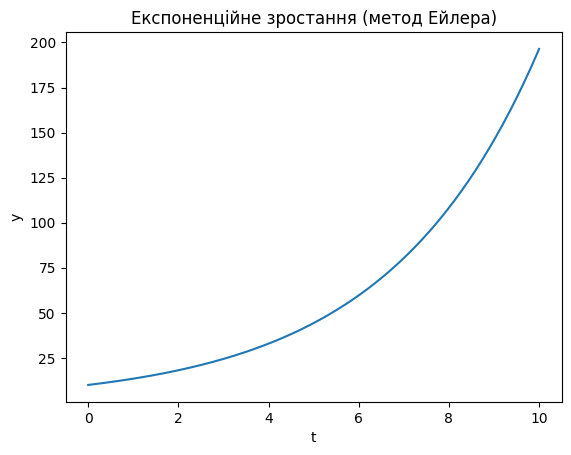

In [9]:
t, y = euler_exponential()
plt.plot(t, y)
plt.title("Експоненційне зростання (метод Ейлера)")
plt.xlabel("t")
plt.ylabel("y")
plt.show()

### 2. Закон охолодження Ньютона

dT/dt = -k*(T - T_env)

In [10]:
def newton_cooling(T, k, T_env):
    return -k * (T - T_env)

def euler_cooling(T0=90, k=0.1, T_env=25, a=0, b=20, N=200):
    h = (b - a) / (N - 1)
    t = [a]
    T = [T0]
    for i in range(N - 1):
        dT = newton_cooling(T[-1], k, T_env)
        T_new = T[-1] + h * dT
        t.append(t[-1] + h)
        T.append(T_new)
    return t, T

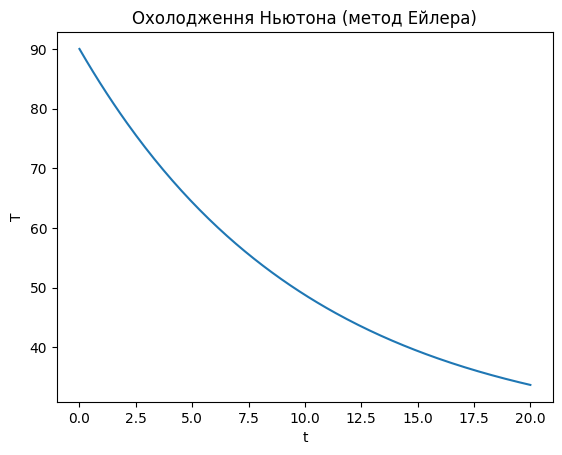

In [11]:
t, T = euler_cooling()
plt.plot(t, T)
plt.title("Охолодження Ньютона (метод Ейлера)")
plt.xlabel("t")
plt.ylabel("T")
plt.show()

### 3. Аттрактор Лоренца

1)dx/dt = σ(y-x)   
2)dy/dt = x(ρ-z) - y   
3)dz/dt = xy - βz


In [12]:
def lorenz(x, y, z, sigma, rho, beta):
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return dx, dy, dz

def euler_lorenz(x0=1, y0=1, z0=1, sigma=10, rho=28, beta=8/3, a=0, b=40, N=10000):
    h = (b - a) / (N - 1)
    x, y, z = [x0], [y0], [z0]
    for i in range(N - 1):
        dx, dy, dz = lorenz(x[-1], y[-1], z[-1], sigma, rho, beta)
        x_new = x[-1] + h * dx
        y_new = y[-1] + h * dy
        z_new = z[-1] + h * dz
        x.append(x_new)
        y.append(y_new)
        z.append(z_new)
    return x, y, z

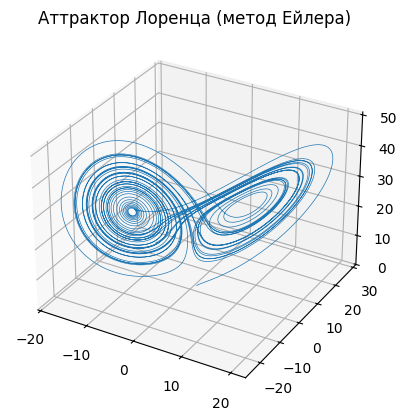

In [13]:
x, y, z = euler_lorenz()
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(x, y, z, lw=0.5)
ax.set_title("Аттрактор Лоренца (метод Ейлера)")
plt.show()


# 3. Для усіх моделей задати відповідні параметри та початкові умови.

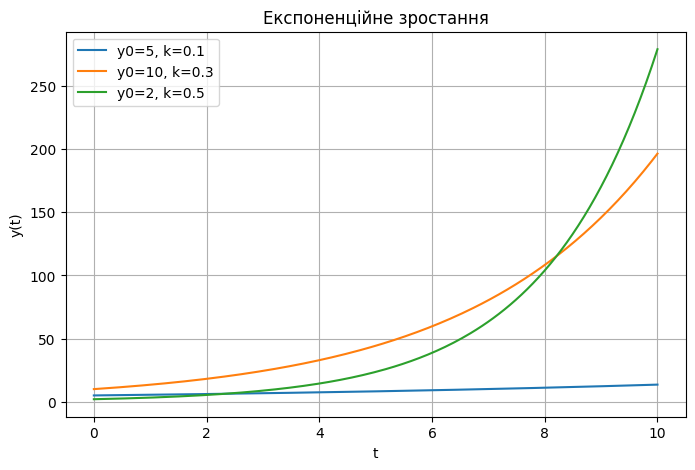

In [14]:
params = [
    {"y0": 5,  "k": 0.1},
    {"y0": 10, "k": 0.3},
    {"y0": 2,  "k": 0.5}
]

plt.figure(figsize=(8, 5))

for p in params:
    t, y = euler_exponential(y0=p["y0"], k=p["k"], a=0, b=10, N=200)
    plt.plot(t, y, label=f"y0={p['y0']}, k={p['k']}")

plt.title("Експоненційне зростання")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.grid(True)
plt.show()


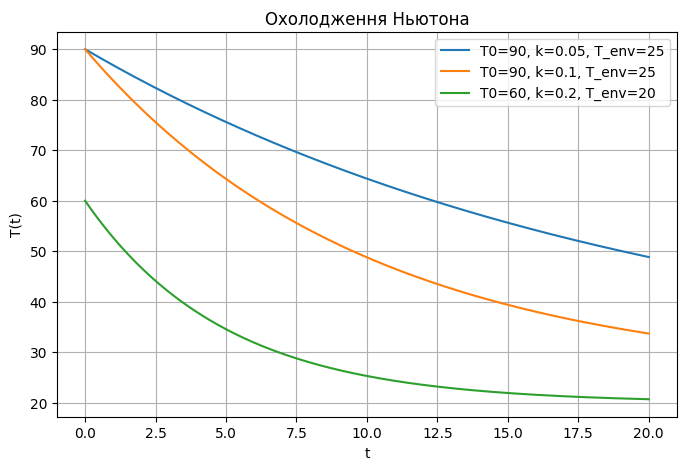

In [15]:
params = [
    {"T0": 90, "k": 0.05, "T_env": 25}, 
    {"T0": 90, "k": 0.1,  "T_env": 25}, 
    {"T0": 60, "k": 0.2,  "T_env": 20}, 
]

plt.figure(figsize=(8, 5))

for p in params:
    t, T = euler_cooling(T0=p["T0"], k=p["k"], T_env=p["T_env"], a=0, b=20, N=200)
    plt.plot(t, T, label=f"T0={p['T0']}, k={p['k']}, T_env={p['T_env']}")

plt.title("Охолодження Ньютона")
plt.xlabel("t")
plt.ylabel("T(t)")
plt.legend()
plt.grid(True)
plt.show()

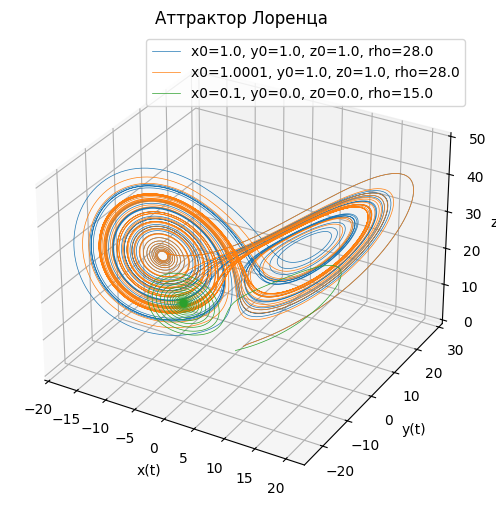

In [16]:
params = [
    {"x0": 1.0, "y0": 1.0, "z0": 1.0, "rho": 28.0},
    {"x0": 1.0001, "y0": 1.0, "z0": 1.0, "rho": 28.0},
    {"x0": 0.1, "y0": 0.0, "z0": 0.0, "rho": 15.0}   
]

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

for p in params:
    x, y, z = euler_lorenz(x0=p["x0"], y0=p["y0"], z0=p["z0"], sigma=10, rho=p["rho"], beta=8/3,
                            a=0, b=40, N=10000)
    ax.plot(x, y, z, lw=0.5, label=f"x0={p['x0']}, y0={p['y0']}, z0={p['z0']}, rho={p['rho']}")

ax.set_title("Аттрактор Лоренца")
ax.set_xlabel("x(t)")
ax.set_ylabel("y(t)")
ax.set_zlabel("z(t)")
ax.legend()
plt.show()